In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
tickers = ['PG', 'MSFT', 'F', 'GE']
data = pd.DataFrame()
for i in tickers:
    data[i] = yf.download(i, start='1995-1-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7082 entries, 1995-01-03 to 2023-02-16
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      7082 non-null   float64
 1   MSFT    7082 non-null   float64
 2   F       7082 non-null   float64
 3   GE      7082 non-null   float64
dtypes: float64(4)
memory usage: 276.6 KB


In [12]:
data.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.771255,2.346929,3.970336,25.555326
1995-01-04,7.708967,2.363990,4.077162,25.555326
1995-01-05,7.599947,2.324996,4.041554,25.617950
1995-01-06,7.615520,2.363990,4.041554,25.492668
1995-01-09,7.584374,2.349367,4.112772,25.242121


In [10]:
data.tail()

,PG,MSFT,F,GE
Date,,,,
2023-02-10,138.259995,262.442657,12.73,81.290001
2023-02-13,140.070007,270.642120,13.09,82.680000
2023-02-14,139.279999,271.490021,12.97,83.540001
2023-02-15,138.960007,269.320007,12.93,84.769997
2023-02-16,137.139999,262.149994,12.91,84.050003


In [11]:
data.iloc[0]

PG       7.771255
MSFT     2.346929
F        3.970336
GE      25.555326
Name: 1995-01-03 00:00:00, dtype: float64

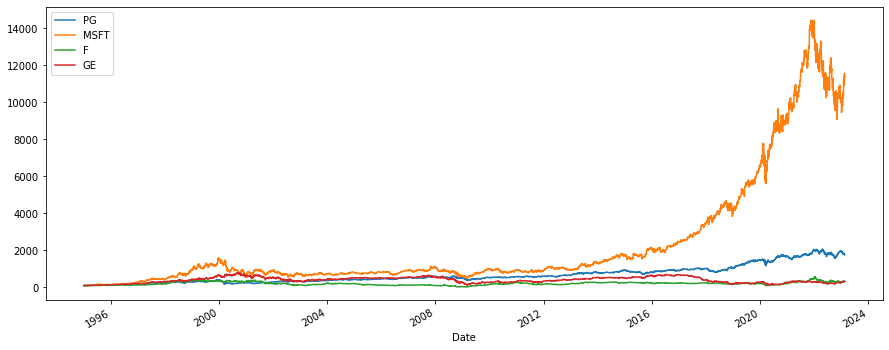

In [20]:
# normalize data
(data / data.iloc[0] * 100).plot(figsize=(15, 6))
plt.show()

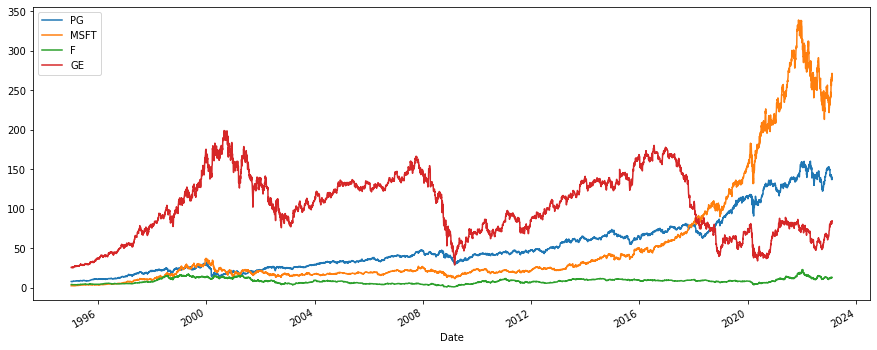

In [19]:
data.plot(figsize=(15,6))

In [25]:
data.loc['1995-01-03']

PG       7.771255
MSFT     2.346929
F        3.970336
GE      25.555326
Name: 1995-01-03 00:00:00, dtype: float64

In [26]:
data.iloc[0]

PG       7.771255
MSFT     2.346929
F        3.970336
GE      25.555326
Name: 1995-01-03 00:00:00, dtype: float64

## Calculating the Return of a Portfolio

In [27]:
returns = (data / data.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008015,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [28]:
weights = np.array([0.25, 0.25, 0.25, 0.25])
np.dot(returns, weights)

array([        nan,  0.00654003, -0.00923001, ..., -0.00031823,
        0.00033724, -0.01244008])

In [29]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.126315
MSFT    0.215962
F       0.122839
GE      0.093652
dtype: float64

In [43]:
np.dot(annual_returns, weights)
portfolio1 = np.dot(annual_returns, weights) * 100
print(round(portfolio1, 2))

13.97


In [46]:
weights2 = np.array([0.4, 0.4, 0.15, 0.05])
portfolio2 = np.dot(annual_returns, weights2) * 100
print(round(portfolio2, 2))

16.0
